In [1]:
import os
import numpy as np
import pandas as pd

os.chdir('../core')

In [2]:
DATA_DIR = "../data"
FILE_NAME = "train.csv"

df = pd.read_csv(os.path.join(DATA_DIR, FILE_NAME))
df = df.drop(columns=["Employee ID"])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df["Attrition"] = df["Attrition"].map({"Stayed": 1, "Left": 0})
print(df.shape)

df.head(5)

(59598, 23)


,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,29,Female,10,Education,4262,Fair,Medium,High,0,Yes,...,0,Senior,Small,52,No,No,No,Poor,High,1
1,18,Male,3,Finance,9032,Good,Very High,High,3,Yes,...,3,Entry,Medium,50,No,No,No,Good,Medium,0
2,30,Female,9,Healthcare,8610,Poor,Medium,Average,2,No,...,4,Entry,Large,62,No,No,No,Fair,Low,0
3,46,Male,2,Education,5071,Fair,High,Average,1,Yes,...,0,Entry,Small,39,No,No,No,Good,High,0
4,37,Male,17,Technology,10037,Fair,High,Average,0,No,...,1,Mid,Medium,42,No,No,No,Good,Low,0


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from processor import LabelEncoderTransformer


target_column = "Attrition"

# Choose numeric columns except the target column
numeric_columns = df.drop(columns=[target_column]).select_dtypes(include=['int64', 'float64']).columns.tolist()
category_columns = df.select_dtypes(include=['object']).columns.tolist()

processor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', LabelEncoderTransformer(), category_columns)
    ]
)

X = processor.fit_transform(df.drop(columns=[target_column]), df[target_column])
y = df[target_column].values.reshape(-1, 1)

X

array([[-0.79190512, -0.51164494, -1.4131925 , ...,  0.        ,
         3.        ,  0.        ],
       [-1.70253344, -1.13409473,  0.80392784, ...,  0.        ,
         2.        ,  2.        ],
       [-0.70912073, -0.60056634,  0.60778009, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.0359388 , -1.22301613, -1.15662008, ...,  0.        ,
         2.        ,  1.        ],
       [-0.87468951,  0.02188346,  1.39515994, ...,  0.        ,
         2.        ,  2.        ],
       [-0.21241438,  0.64433325, -1.38019134, ...,  0.        ,
         2.        ,  2.        ]])

# Gradient Descent with Acceleration

In [4]:
folder = "acceleration"
folder_path = f"../images/{folder}"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Parameters for plot
fontsize = 17
offset = 4

In [5]:
import matplotlib.pyplot as plt
from base import LogisticRegressionAcceleration

learning_rates = [0.01, 0.05, 0.1, 0.2, 0.4]
num_iterations = 1000
regularization = "None"

loss_loggers = {}
time_loggers = {}
gradient_loggers = {}
for learning_rate in learning_rates:
    lr = LogisticRegressionAcceleration(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        regularization=regularization,
        log=True
    )
    lr.fit(X, y)

    # Save logs
    loss_loggers[learning_rate] = lr.history
    time_loggers[learning_rate] = lr.times

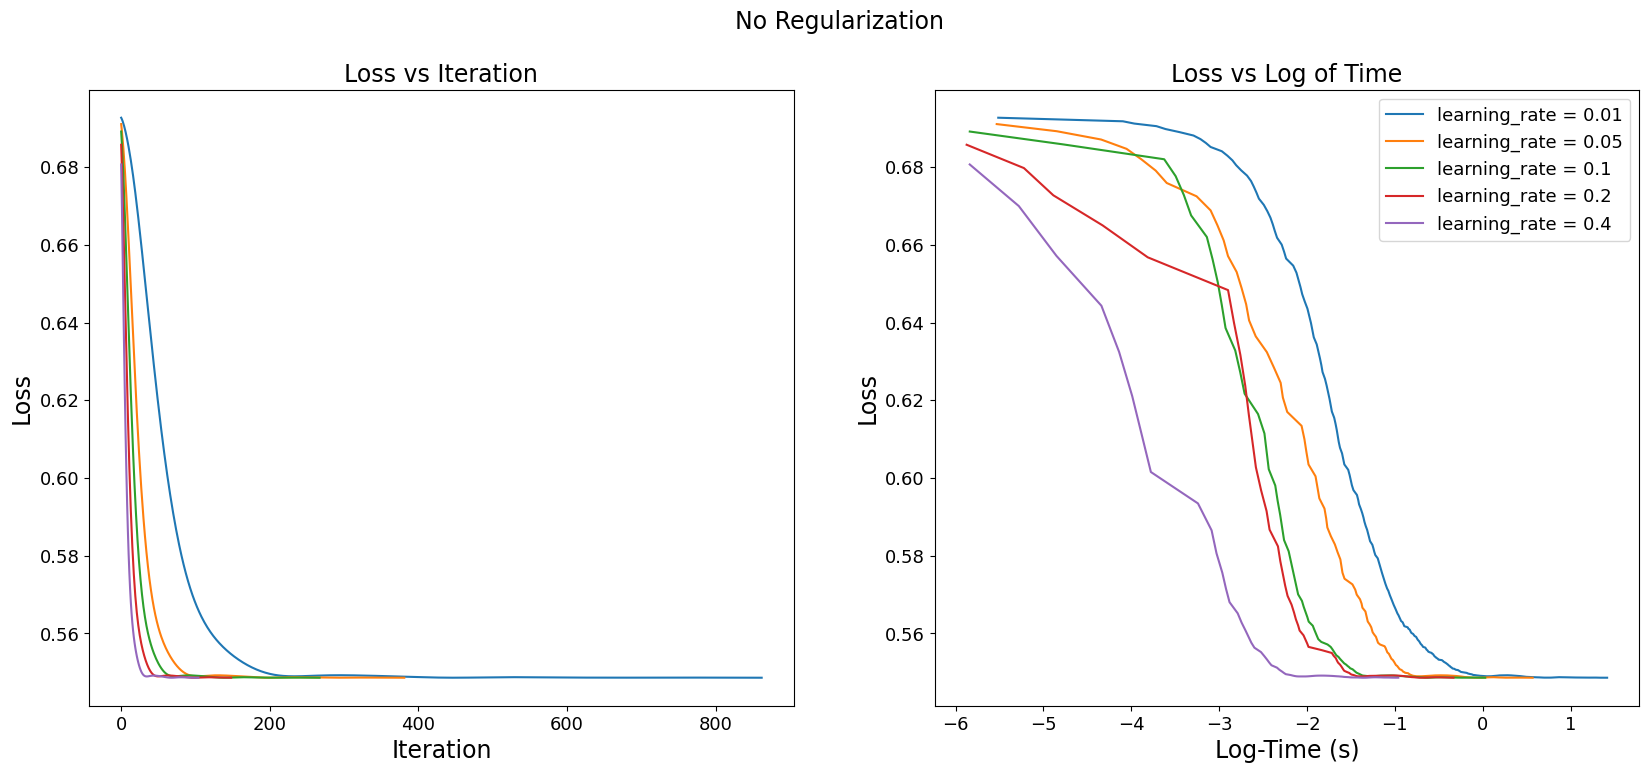

In [6]:
# Plot loss for each learning rate with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Title for the subplots
fig.suptitle("No Regularization", fontsize=fontsize)

# Plot loss vs iteration
axs[0].set_title("Loss vs Iteration", fontsize=fontsize)
for learning_rate in learning_rates:
    axs[0].plot(loss_loggers[learning_rate], label=f"learning_rate = {learning_rate}")

axs[0].set_xlabel("Iteration", fontsize=fontsize)
axs[0].set_ylabel("Loss", fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=fontsize - offset)
axs[0].tick_params(axis='y', labelsize=fontsize - offset)
# axs[0].legend()

# Plot loss vs time
axs[1].set_title("Loss vs Log of Time", fontsize=fontsize)
for learning_rate in learning_rates:
    axs[1].plot(np.log(time_loggers[learning_rate]), loss_loggers[learning_rate], label=f"learning_rate = {learning_rate}")

axs[1].set_xlabel("Log-Time (s)", fontsize=fontsize)
axs[1].set_ylabel("Loss", fontsize=fontsize)
axs[1].tick_params(axis='x', labelsize=fontsize - offset)
axs[1].tick_params(axis='y', labelsize=fontsize - offset)
axs[1].legend(fontsize=fontsize - offset)

# Save image
file_path = f"{folder_path}/acc_loss_no_regularization.png"
plt.savefig(file_path, format='png')

plt.show()

# L1 Regularization

In [7]:
import matplotlib.pyplot as plt
# from base import LogisticRegressionAcceleration

lambda_values = [0, 10, 100, 500, 1000, 5000]
learning_rate = 0.1
num_iterations = 1000
regularization = "l1"

loss_loggers = {}
time_loggers = {}

for lambda_value in lambda_values:
    lr = LogisticRegressionAcceleration(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        regularization=regularization,
        lambda_=lambda_value,
        log=True
    )
    lr.fit(X, y)

    # Save logs
    loss_loggers[lambda_value] = lr.history
    time_loggers[lambda_value] = lr.times

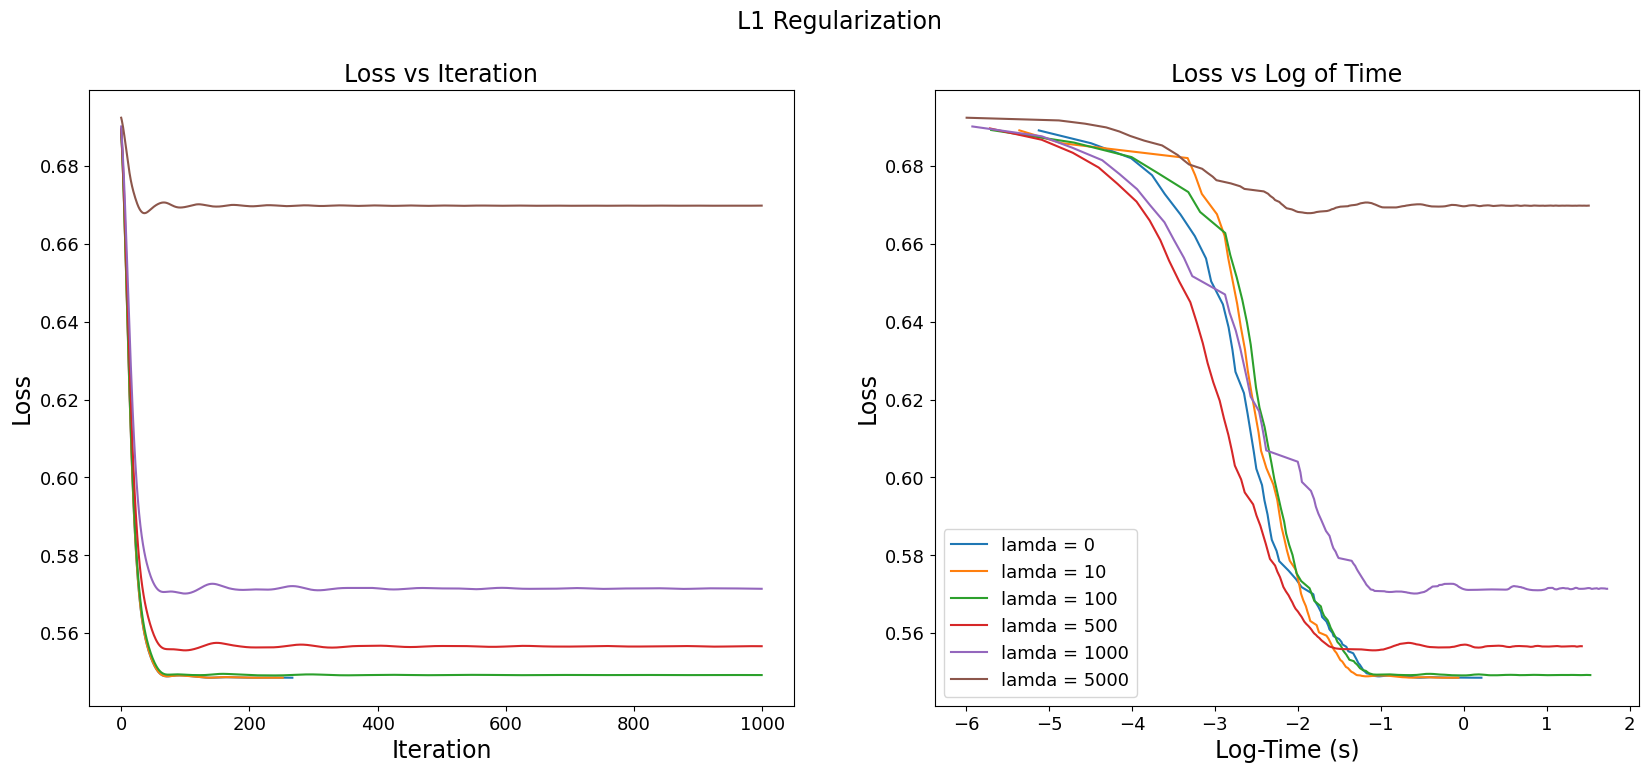

In [8]:
# Plot loss for each learning rate with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Title for the subplots
fig.suptitle("L1 Regularization", fontsize=fontsize)

# Plot loss vs iteration
axs[0].set_title("Loss vs Iteration", fontsize=fontsize)
for lambda_value in lambda_values:
    axs[0].plot(loss_loggers[lambda_value], label=f"lamda = {lambda_value}")

axs[0].set_xlabel("Iteration", fontsize=fontsize)
axs[0].set_ylabel("Loss", fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=fontsize - offset)
axs[0].tick_params(axis='y', labelsize=fontsize - offset)
# axs[0].legend()

# Plot loss vs time
axs[1].set_title("Loss vs Log of Time", fontsize=fontsize)
for lambda_value in lambda_values:
    axs[1].plot(np.log(time_loggers[lambda_value]), loss_loggers[lambda_value], label=f"lamda = {lambda_value}")

axs[1].set_xlabel("Log-Time (s)", fontsize=fontsize)
axs[1].set_ylabel("Loss", fontsize=fontsize)
axs[1].tick_params(axis='x', labelsize=fontsize - offset)
axs[1].tick_params(axis='y', labelsize=fontsize - offset)
axs[1].legend(fontsize=fontsize - offset)

# Save image
file_path = f"{folder_path}/acc_loss_l1_regularization.png"
plt.savefig(file_path, format='png')

plt.show()

# L2 Regularization

In [9]:
import matplotlib.pyplot as plt
from base import LogisticRegressionAcceleration

lambda_values = [0, 10, 100, 500, 1000, 5000]
learning_rate = 0.1
num_iterations = 1000
regularization = "l2"

loss_loggers = {}
time_loggers = {}

for lambda_value in lambda_values:
    lr = LogisticRegressionAcceleration(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        regularization=regularization,
        lambda_=lambda_value,
        log=True
    )
    lr.fit(X, y)

    # Save logs
    loss_loggers[lambda_value] = lr.history
    time_loggers[lambda_value] = lr.times

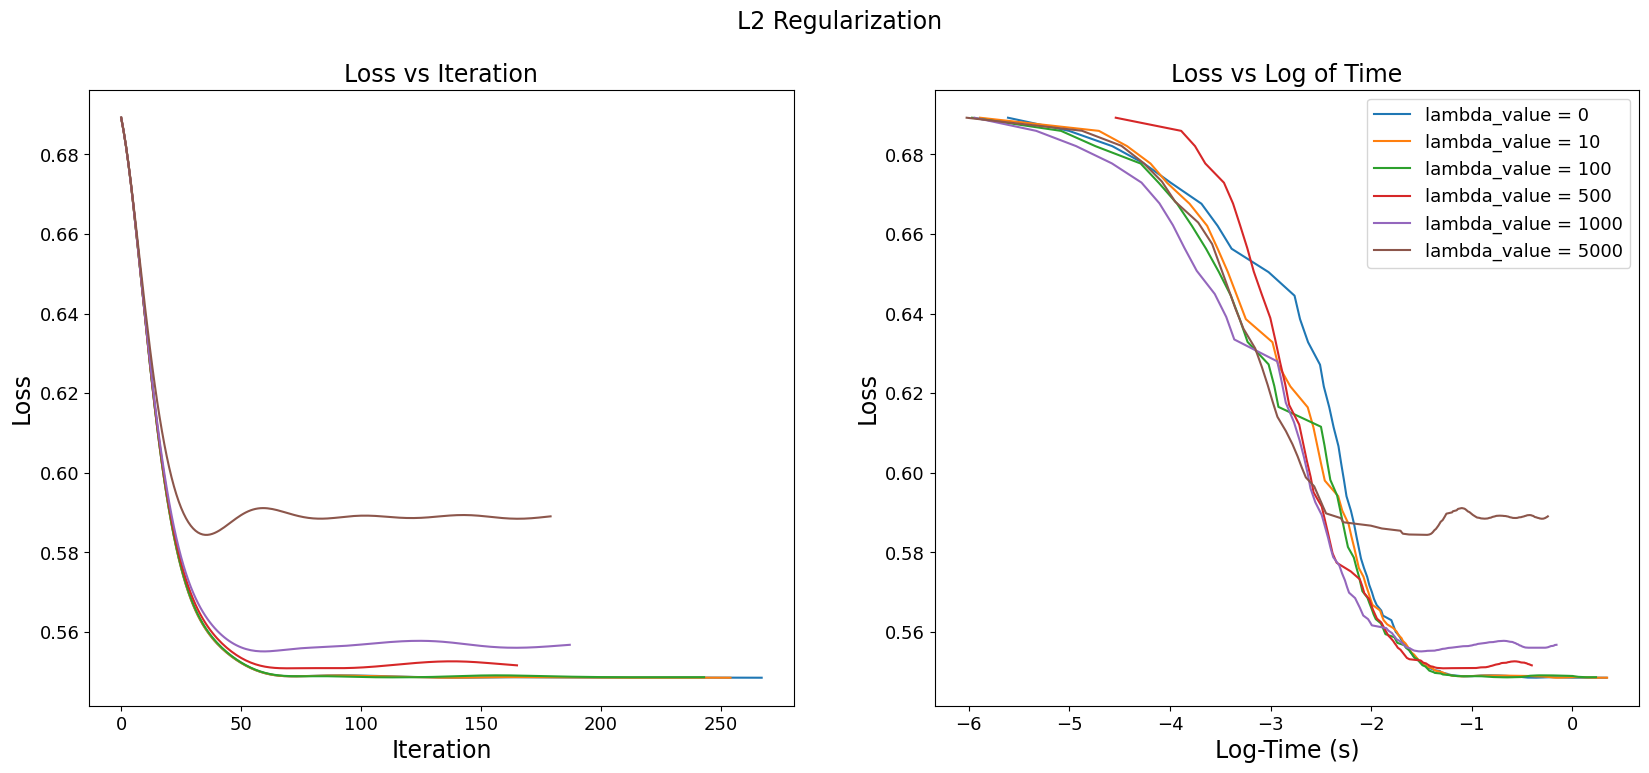

In [10]:
# Plot loss for each learning rate with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Title for the subplots
fig.suptitle("L2 Regularization", fontsize=fontsize)

# Plot loss vs iteration
axs[0].set_title("Loss vs Iteration", fontsize=fontsize)
for lambda_value in lambda_values:
    axs[0].plot(loss_loggers[lambda_value], label=f"lambda_value = {lambda_value}")

axs[0].set_xlabel("Iteration", fontsize=fontsize)
axs[0].set_ylabel("Loss", fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=fontsize - offset)
axs[0].tick_params(axis='y', labelsize=fontsize - offset)
# axs[0].legend()

# Plot loss vs time
axs[1].set_title("Loss vs Log of Time", fontsize=fontsize)
for lambda_value in lambda_values:
    axs[1].plot(np.log(time_loggers[lambda_value]), loss_loggers[lambda_value], label=f"lambda_value = {lambda_value}")

axs[1].set_xlabel("Log-Time (s)", fontsize=fontsize)
axs[1].set_ylabel("Loss", fontsize=fontsize)
axs[1].tick_params(axis='x', labelsize=fontsize - offset)
axs[1].tick_params(axis='y', labelsize=fontsize - offset)
axs[1].legend(fontsize=fontsize - offset)

# Save image
file_path = f"{folder_path}/acc_loss_l2_regularization.png"
plt.savefig(file_path, format='png')

plt.show()